In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.csv")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape


(2919, 13)

In [27]:
dataset.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF     SalePrice  
0             2003     VinylSd         0.0        856.0  208500.00000  
1             1976     MetalSd         0.0       1262.0  181500.00000  
2             2002     VinylSd         0.0        920.0  223500.00000  
3             1970     Wd Sdng         0.0        756.0  140000.00000  
4             2000     VinylSd         0.0       1145.0  250000.00000  
...            ...         ...         ...          ...           ...  
2914          1970     CemntBd         0.0        546.0  180921.19589  
2915          1970     CemntBd         0.0        546.0  180921.19589  
2916          1996     VinylSd         0.0       1224.0  180921.19589  
2917          1992     HdBoard         0.0        912.0  180921.19589  
2918          1994     HdBoard         0.0        996.0  180921.19589  

[2919 rows x 12 columns]>

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [29]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 5
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

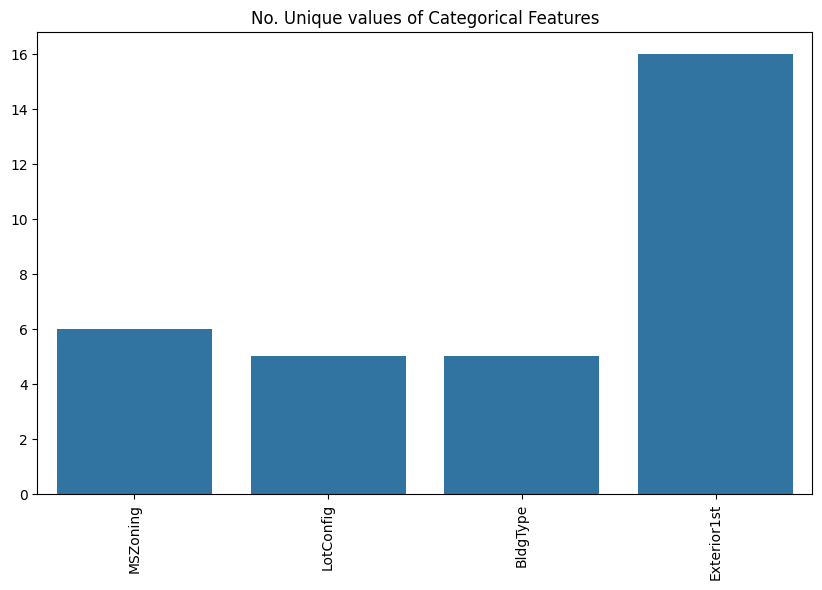

In [8]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)




<ipython-input-9-e3f78351eddb>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


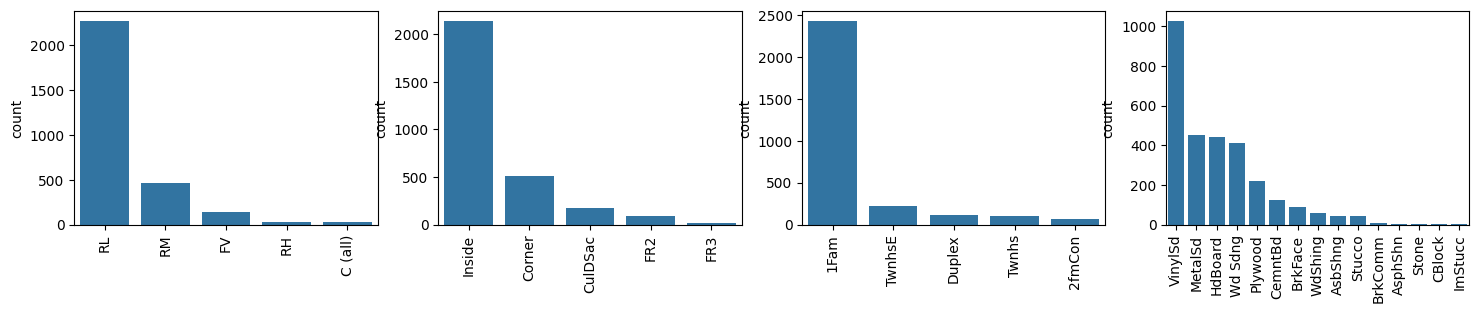

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [10]:

dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [11]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [12]:
new_dataset = dataset.dropna()


In [13]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [14]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [16]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assume new_dataset and object_cols are defined
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)  # Use get_feature_names_out instead of get_feature_names
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Check the result
print(df_final.head())


   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  MSZoning_C (all)  MSZoning_FV  ...  \
0        856.0   208500.0               0.0          0.0  ...   
1       1262.0   181500.0               0.0          0.0  ...   
2        920.0   223500.0               0.0          0.0  ...   
3        756.0   140000.0               0.0          0.0  ...   
4       1145.0   250000.0               0.0          0.0  ...   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                  0.0                  0.0                  0.0   
1               

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [18]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [19]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19095094032106255

In [20]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599854


In [23]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor


cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)

# Make predictions
preds = cb_model.predict(X_valid)

# Calculate and print R² score
cb_r2_score = r2_score(Y_valid, preds)
print(f"R² Score: {cb_r2_score}")


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 58.5ms	remaining: 58.5s
1:	learn: 55780.1567575	total: 63.5ms	remaining: 31.7s
2:	learn: 55060.9599505	total: 68.6ms	remaining: 22.8s
3:	learn: 54456.1126921	total: 74ms	remaining: 18.4s
4:	learn: 53901.1464265	total: 95.7ms	remaining: 19s
5:	learn: 53334.6062357	total: 105ms	remaining: 17.4s
6:	learn: 52824.4943646	total: 115ms	remaining: 16.4s
7:	learn: 52381.4267520	total: 126ms	remaining: 15.6s
8:	learn: 51841.0364316	total: 136ms	remaining: 14.9s
9:	learn: 51281.5852560	total: 143ms	remaining: 14.2s
10:	learn: 50825.3817438	total: 160ms	remaining: 14.3s
11:	learn: 50477.2609796	total: 175ms	remaining: 14.4s
12:	learn: 50081.4097641	total: 194ms	remaining: 14.7s
13:	learn: 49663.6380360	total: 203ms	remaining: 14.3s
14:	learn: 49334.5782662	total: 215ms	remaining: 14.1s
15:	learn: 48967.5221026	total: 226ms	remaining: 13.9s
16:	learn: 48676.4063222	total: 237ms	remaining: 13.7s
17:	learn: 48359.1169955	total: 247ms	remain